<a href="https://colab.research.google.com/github/polinka001/Data-Science-portfolio/blob/main/Doordash1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
from google.colab import files
import zipfile
import os

This code imports modules for uploading/downloading files in Colab, handling ZIP archives, and interacting with the file system

In [163]:
uploaded = files.upload()

Saving datasets.zip to datasets (1).zip


In [164]:
zip_path = 'datasets.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall('dataset')

This code opens the 'datasets.zip' archive in read mode and extracts all its contents into the 'dataset' folder

In [165]:
import pandas as pd

df = pd.read_csv("/content/dataset/datasets/historical_data.csv")

In [166]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0000,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0000,4,3441,4,557,1239,33.0000,14.0000,21.0000,446,861.0000
1,2.0000,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0000,1,1900,1,1400,1400,1.0000,2.0000,2.0000,446,690.0000
2,3.0000,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0000,1,1900,1,1900,1900,1.0000,0.0000,0.0000,446,690.0000
3,3.0000,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0000,6,6900,5,600,1800,1.0000,1.0000,2.0000,446,289.0000
4,3.0000,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0000,3,3900,3,1100,1600,6.0000,6.0000,9.0000,446,650.0000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [171]:
df['order_protocol'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [172]:
from datetime import datetime

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

Convering the 'created_at' and 'actual_delivery_time' columns in the DataFrame to datetime objects

In [173]:
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at'])

df['busy_dasher_ratio'] = (df['total_busy_dashers'] / df['total_onshift_dashers'])

Creating new columns

In [174]:
order_protocol_dummies = pd.get_dummies(df.order_protocol, dtype = int)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_dummies_')
order_protocol_dummies.head()

,order_protocol_dummies_1.0,order_protocol_dummies_2.0,order_protocol_dummies_3.0,order_protocol_dummies_4.0,order_protocol_dummies_5.0,order_protocol_dummies_6.0,order_protocol_dummies_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [175]:
market_id_dummies = pd.get_dummies(df.market_id, dtype = int)
market_id_dummies = market_id_dummies.add_prefix('market_id_dummies_')
market_id_dummies.head()

,market_id_dummies_1.0,market_id_dummies_2.0,market_id_dummies_3.0,market_id_dummies_4.0,market_id_dummies_5.0,market_id_dummies_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [176]:
store_primary_category_dummies = pd.get_dummies(df.store_primary_category, dtype = int)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('store_primary_category_dummies_')
store_primary_category_dummies.head()

,store_primary_category_dummies_afghan,store_primary_category_dummies_african,store_primary_category_dummies_alcohol,store_primary_category_dummies_alcohol-plus-food,store_primary_category_dummies_american,store_primary_category_dummies_argentine,store_primary_category_dummies_asian,store_primary_category_dummies_barbecue,store_primary_category_dummies_belgian,store_primary_category_dummies_brazilian,...,store_primary_category_dummies_southern,store_primary_category_dummies_spanish,store_primary_category_dummies_steak,store_primary_category_dummies_sushi,store_primary_category_dummies_tapas,store_primary_category_dummies_thai,store_primary_category_dummies_turkish,store_primary_category_dummies_vegan,store_primary_category_dummies_vegetarian,store_primary_category_dummies_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


One-hot encoding: Converts these columns into multiple binary (0/1) columns, one for each unique category

In [177]:
unique_store_id = df['store_id'].unique().tolist()

unique_id_mode = {unique_id: df[df.store_id == unique_id].store_primary_category.mode()
                  for unique_id in unique_store_id}

Creates a dictionary showing the most common category for each store

In [178]:
import numpy as np

def fill(store_id):
  try:
    return unique_id_mode[store_id].values[0]
  except:
    return np.nan

df['nan_free_store_primary_category'] = df.store_id.apply(fill)

Fills a new column with the most frequent store category for each store, avoiding missing values

In [179]:
train_df = df.drop(columns = ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'nan_free_store_primary_category'], axis = 1)
train_df

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,busy_dasher_ratio
0,1.0000,4,3441,4,557,1239,33.0000,14.0000,21.0000,446,861.0000,0 days 01:02:59,0.4242
1,2.0000,1,1900,1,1400,1400,1.0000,2.0000,2.0000,446,690.0000,0 days 01:07:04,2.0000
2,1.0000,1,1900,1,1900,1900,1.0000,0.0000,0.0000,446,690.0000,0 days 00:29:41,0.0000
3,1.0000,6,6900,5,600,1800,1.0000,1.0000,2.0000,446,289.0000,0 days 00:51:15,1.0000
4,1.0000,3,3900,3,1100,1600,6.0000,6.0000,9.0000,446,650.0000,0 days 00:39:50,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,4.0000,3,1389,3,345,649,17.0000,17.0000,23.0000,251,331.0000,0 days 01:05:07,1.0000
197424,4.0000,6,3010,4,405,825,12.0000,11.0000,14.0000,251,915.0000,0 days 00:56:23,0.9167
197425,4.0000,5,1836,3,300,399,39.0000,41.0000,40.0000,251,795.0000,0 days 00:50:08,1.0513
197426,1.0000,1,1175,1,535,535,7.0000,7.0000,12.0000,446,384.0000,0 days 01:05:07,1.0000


In [180]:
train_df = pd.concat([train_df, market_id_dummies, order_protocol_dummies, store_primary_category_dummies], axis = 1)
train_df

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,store_primary_category_dummies_southern,store_primary_category_dummies_spanish,store_primary_category_dummies_steak,store_primary_category_dummies_sushi,store_primary_category_dummies_tapas,store_primary_category_dummies_thai,store_primary_category_dummies_turkish,store_primary_category_dummies_vegan,store_primary_category_dummies_vegetarian,store_primary_category_dummies_vietnamese
0,1.0000,4,3441,4,557,1239,33.0000,14.0000,21.0000,446,...,0,0,0,0,0,0,0,0,0,0
1,2.0000,1,1900,1,1400,1400,1.0000,2.0000,2.0000,446,...,0,0,0,0,0,0,0,0,0,0
2,1.0000,1,1900,1,1900,1900,1.0000,0.0000,0.0000,446,...,0,0,0,0,0,0,0,0,0,0
3,1.0000,6,6900,5,600,1800,1.0000,1.0000,2.0000,446,...,0,0,0,0,0,0,0,0,0,0
4,1.0000,3,3900,3,1100,1600,6.0000,6.0000,9.0000,446,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,4.0000,3,1389,3,345,649,17.0000,17.0000,23.0000,251,...,0,0,0,0,0,0,0,0,0,0
197424,4.0000,6,3010,4,405,825,12.0000,11.0000,14.0000,251,...,0,0,0,0,0,0,0,0,0,0
197425,4.0000,5,1836,3,300,399,39.0000,41.0000,40.0000,251,...,0,0,0,0,0,0,0,0,0,0
197426,1.0000,1,1175,1,535,535,7.0000,7.0000,12.0000,446,...,0,0,0,0,0,0,0,0,0,0


In [181]:
train_df['busy_dasher_ratio'].describe()

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,busy_dasher_ratio
count,177590.0000
mean,NaN
std,NaN
min,-inf
25%,0.8269
50%,0.9623
75%,1.0000
max,inf


Checking if we have -inf/inf

In [182]:
np.where(np.any(~np.isfinite(train_df), axis = 0))

(array([ 0,  6,  7,  8, 10, 11, 12]),)

Finds which columns in train_df contain NaN or infinite values

In [183]:
train_df = train_df.replace([np.inf, -np.inf], np.nan)

In [184]:
train_df.dropna(inplace = True)
train_df.shape

(176166, 100)

<Axes: >

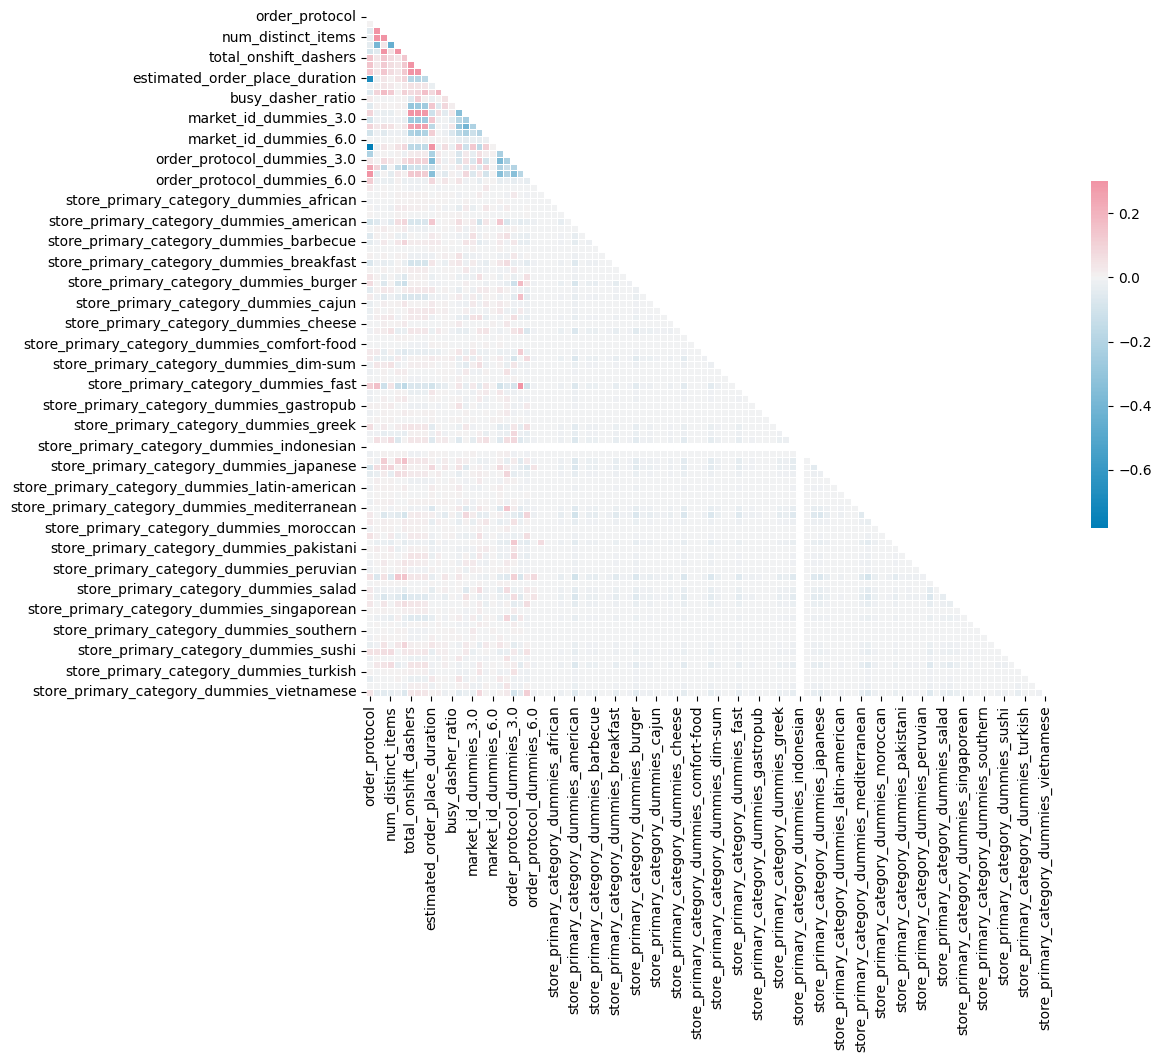

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(240, 10, s=100, l=50, n=9, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax = .3, center = 0, square=True, linewidths = .5, cbar_kws={'shrink': .5})

In [187]:
train_df['store_primary_category_dummies_indonesian'].describe()

,store_primary_category_dummies_indonesian
count,176166.0000
mean,0.0000
std,0.0000
min,0.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,0.0000


In [31]:
def labels_to_drop(df):
  cols = df.columns
  pairs_to_drop = set()
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

Generates a set of all pairs of columns from the DataFrame, including each column paired with itself and previous columns

In [32]:
def get_top_abs_correlatios (df, n):
  au_corr = df.corr().abs().unstack()
  label_to_drop = labels_to_drop(df)
  au_corr = au_corr.drop(labels = label_to_drop).sort_values(ascending = False)
  return au_corr[0: n]

Finds the n strongest correlations between different features, ignoring self-correlations and duplicates

In [189]:
train_df = train_df.drop(columns = ['store_primary_category_dummies_indonesian',
                                    'total_busy_dashers',
                                    'order_protocol',
                                    'market_id_dummies_1.0',
                                    'market_id_dummies_2.0',
                                    'market_id_dummies_3.0',
                                    'market_id_dummies_4.0',
                                    'market_id_dummies_5.0',
                                    'market_id_dummies_6.0',
                                    'order_protocol_dummies_1.0',
                                    'order_protocol_dummies_2.0',
                                    'order_protocol_dummies_3.0',
                                    'order_protocol_dummies_4.0',
                                    'order_protocol_dummies_5.0',
                                    'order_protocol_dummies_6.0',
                                    'order_protocol_dummies_7.0'])

In [190]:
print(get_top_abs_correlatios(train_df, 20))

total_onshift_dashers                         total_outstanding_orders                  0.9347
total_items                                   num_distinct_items                        0.7579
subtotal                                      num_distinct_items                        0.6830
total_items                                   subtotal                                  0.5569
min_item_price                                max_item_price                            0.5413
subtotal                                      max_item_price                            0.5079
num_distinct_items                            min_item_price                            0.4466
total_items                                   min_item_price                            0.3891
estimated_store_to_consumer_driving_duration  delivery_duration                         0.1880
total_onshift_dashers                         estimated_order_place_duration            0.1845
subtotal                                      deli

In [191]:
train_df = train_df.assign(
    orders_to_available_dashers_ratio = train_df['total_outstanding_orders'] / train_df['total_onshift_dashers']
).drop(columns=['total_outstanding_orders', 'total_onshift_dashers'])

train_df = train_df.assign(
    avg_price_per_item = train_df['subtotal'] / train_df['total_items']
).drop(columns=['subtotal', 'total_items'])

train_df = train_df.assign(
    price_range_of_itms = train_df['max_item_price'] - train_df['min_item_price']
).drop(columns=['max_item_price', 'min_item_price'])

Feature engineering: creating more informative features while cleaning up unnecessary raw columns

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
features = train_df.drop('delivery_duration', axis = 1).columns.to_list()
X = train_df[features].select_dtypes(include=[np.number]).dropna()

In [194]:
def compute_vif(X):
  vif_data = pd.DataFrame()
  vif_data['feature'] = X.columns
  vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

X = train_df[features].select_dtypes(include=[np.number]).dropna()
via_data = compute_vif(X)

Multicollinearity check step: higher VIF values indicate features that are highly correlated with others and may need to be removed or transformed

In [195]:
# int(via_data['VIF'].iloc[-1])

11

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

selected_features = via_data['feature'].values.tolist()

X = train_df[selected_features]
y = train_df['delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model training step in a supervised learning pipeline

In [197]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%0.4f' %x)

Formatting for better readability of numerical outputs

In [198]:
feats = {}

importances = model.feature_importances_

for feat, imp in zip(X.columns, importances):
  feats[feat] = imp

importances_df = pd.DataFrame.from_dict(feats, orient='index')

importances_df = importances_df.rename(columns={0: "Gini-importance"})

importances_df

,Gini-importance
store_primary_category_dummies_alcohol-plus-food,0.0000
store_primary_category_dummies_chocolate,0.0000
store_primary_category_dummies_belgian,0.0000
store_primary_category_dummies_lebanese,0.0000
store_primary_category_dummies_russian,0.0000
...,...
avg_price_per_item,0.2348
estimated_store_to_consumer_driving_duration,0.1430
busy_dasher_ratio,0.1066
orders_to_available_dashers_ratio,0.2603


It turns raw feature importance data into a readable table.

/tmp/ipython-input-298139553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_df.index, y=importances_df['Gini-importance'], palette="viridis")


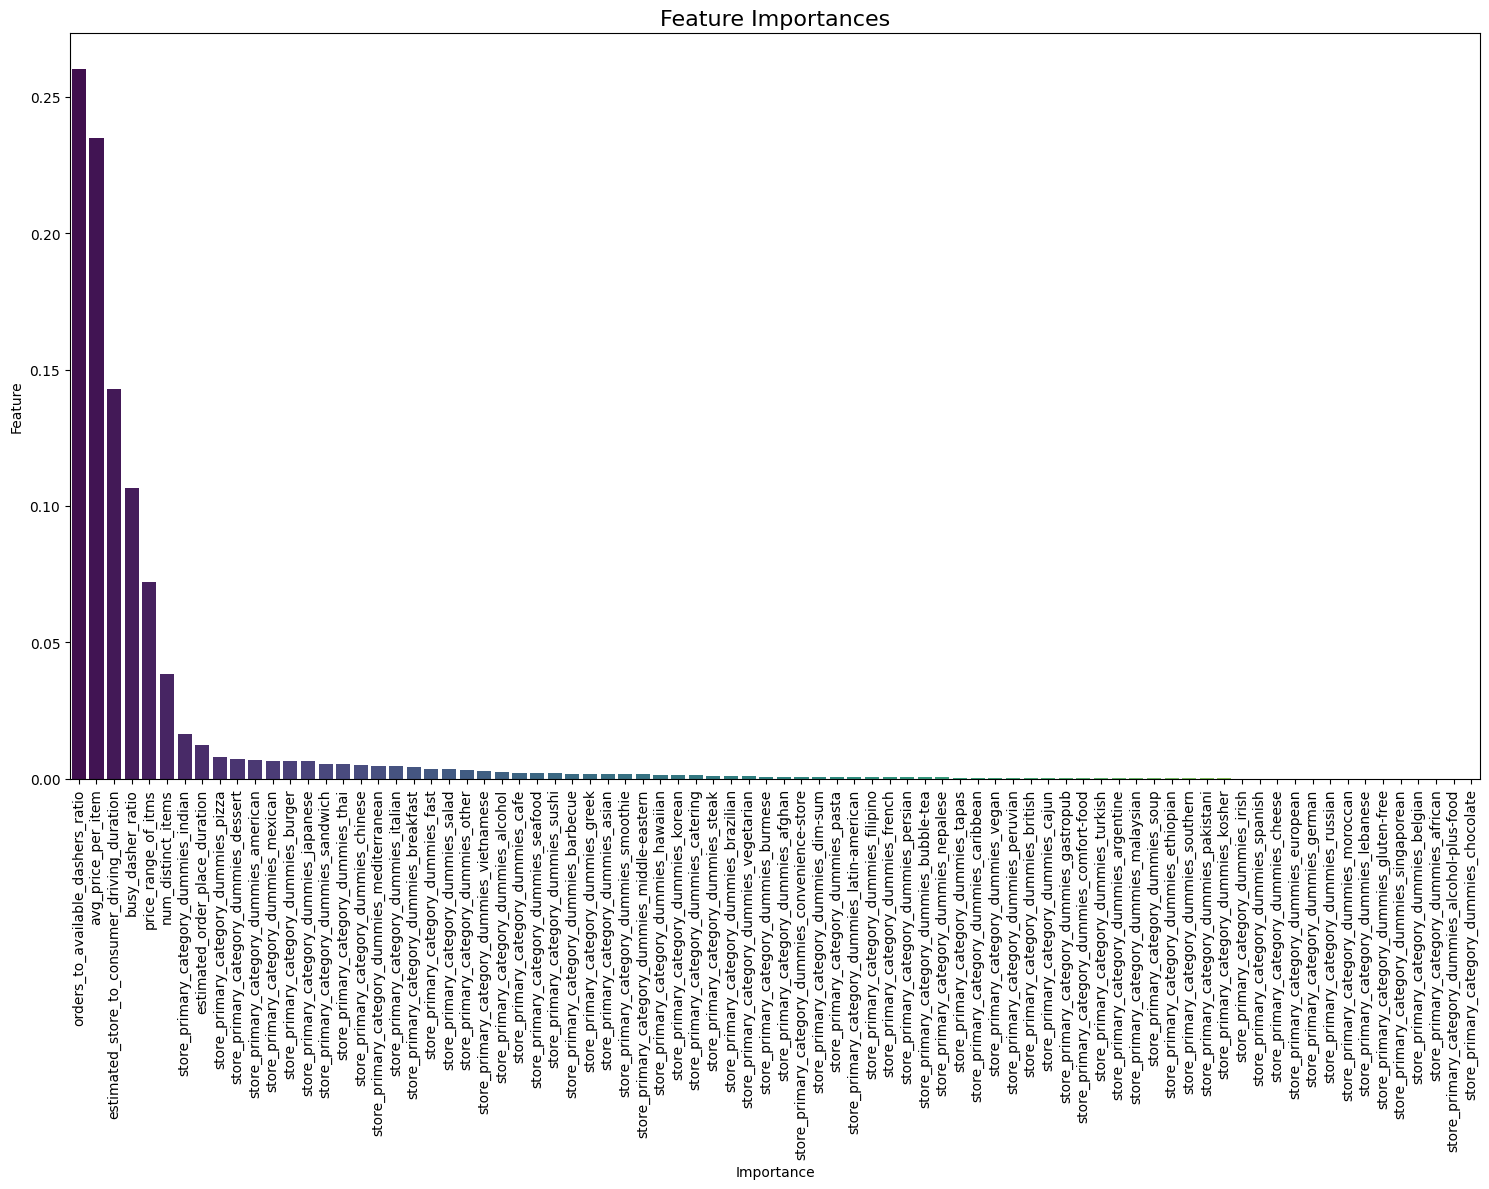

In [200]:
importances_df = importances_df.sort_values(by=['Gini-importance'], ascending=False)

plt.figure(figsize=(15, 12))
sns.barplot(x=importances_df.index, y=importances_df['Gini-importance'], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
pca = PCA().fit(X_train_std)

Standardizes the training data and fits PCA to identify the main directions of variance

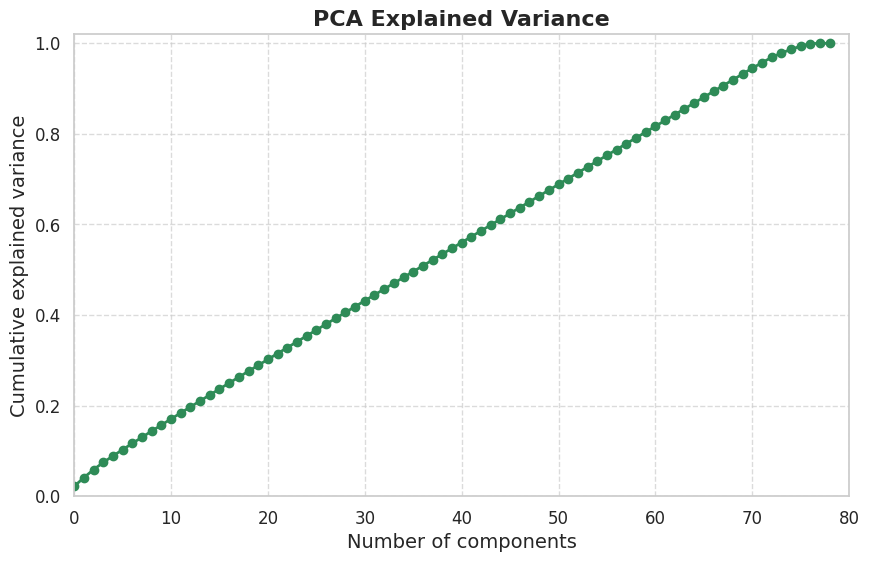

In [201]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

plt.plot(
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    color='seagreen',
    linewidth=2,
    markersize=6
)

plt.xlabel('Number of components', fontsize=14)
plt.ylabel('Cumulative explained variance', fontsize=14)
plt.title('PCA Explained Variance', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 80)
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [202]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

In [203]:
def scale(scaler, X, y):
  reshaped_y = y.values.reshape(-1,1)
  X_scaler = scaler
  y_scaler = scaler


  X_scaler.fit(X)
  X_scaled = X_scaler.transform(X)

  y_scaler.fit(reshaped_y)
  y_scaled = y_scaler.transform(reshaped_y)

  return X_scaler, y_scaler, X_scaled, y_scaled


Prepares both features and target by scaling them for modeling

In [214]:
X_scaler, y_scaler, X_scaled, y_scaled = scale(minmax, X, y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, random_state=42, test_size = 0.2)

Scales the data and prepares train/test splits for modeling

In [227]:
from sklearn.metrics import root_mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):

  y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))

  rmse_error = root_mean_squared_error(y_test, y_predict[:, 0])
  print('Error = '"{}".format(rmse_error) +' in '+ model_name)

  return rmse_error, y_predict

Compute and report RMSE after reversing scaling on predictions

In [206]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [228]:
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose = True):
  model.fit(X_train, y_train)
  y_predict = model.predict(X_train)
  y_train_error = root_mean_squared_error(y_train, y_predict)

  y_predict = model.predict(X_test)
  y_test_error = root_mean_squared_error(y_test, y_predict)

  if verbose:
    print('Train error' "{}".format(y_train_error)+' in '+ model_name)
    print('Test error' "{}".format(y_test_error)+' in '+ model_name)
  trained_model = model

  return trained_model, y_predict, y_train_error, y_test_error

Train a regression model and report its train/test RMSE

In [229]:
regression_models = {
    'Ridge': linear_model.Ridge(),
    'MLP': MLPRegressor(),
    'XGBoost': XGBRegressor(),
    'LGBM': LGBMRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': tree.DecisionTreeRegressor(max_depth=6)
}

scalers = {
    'Standart Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'NotScale': None
}

feature_sets = {
    'Full Dataset': importances_df.sort_values(by = ['Gini-importance']).index.tolist(),
    'Selected Features 40': importances_df.sort_values(by = ['Gini-importance'])[-40:].index.tolist(),
    'Selected Features 20': importances_df.sort_values(by = ['Gini-importance'])[-20:].index.tolist(),
    'Selected Features 10': importances_df.sort_values(by = ['Gini-importance'])[-10:].index.tolist()
}

pred_dict = {
    'Regression model': [],
    'Feature set': [],
    'RMSE': [],
    'Scaler name': []
}

Prepare models, scalers, feature subsets, and a container to record RMSE results

In [230]:
train_df["delivery_duration_sec"] = train_df["delivery_duration"].dt.total_seconds()

for feature_set_name in feature_sets.keys():
  feature_set = feature_sets[feature_set_name]
  for scaler in scalers.keys():
    print(f'Scaled with {scaler} ------------------ included sample is {feature_set_name}')
    print('')
    exclude_cols = ['delivery_duration_sec', 'prep_time',
                'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']

    X = train_df[feature_set].drop(columns=[col for col in exclude_cols if col in feature_set], axis = 1)
    y = train_df['delivery_duration_sec']
    # X = train_df[feature_set]
    # y = train_df['delivery_duration_sec']
    for regression_model in regression_models.keys():
      if scaler == 'NotScale':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
        make_regression(X_train, y_train, X_test, y_test, regression_models[regression_model],
                        regression_model, verbose = True)
      else:
        X_scaler, y_scaler, X_scaled, y_scaled = scale(scalers[scaler], X, y)
        X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(
            X_scaled, y_scaled, random_state=42, test_size=0.2)
        _, y_predict_scaled, _, _ = make_regression(X_scaled_train, y_scaled_train[:,0],
                                              X_scaled_test, y_scaled_test[:,0],
                                              regression_models[regression_model],
                                              regression_model, verbose = True)
        rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, regression_model)
      pred_dict['Regression model'].append(regression_model)
      pred_dict['Feature set'].append(feature_set_name)
      pred_dict['RMSE'].append(rmse_error)
      pred_dict['Scaler name'].append(scaler)

Scaled with Standart Scaler ------------------ included sample is Full Dataset

Train error0.9910616851732417 in Ridge
Test error0.7600770798925038 in Ridge
Error = 1061.523863432433 in Ridge
Train error0.9722657454773374 in MLP
Test error0.7477208298853049 in MLP
Error = 1044.2671211990873 in MLP
Train error0.7547312821271828 in XGBoost
Test error0.7402204817107775 in XGBoost
Error = 1033.7921318651943 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 140932, number of used features: 67
[LightGBM] [Info] Start training from score 0.000065


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.9040133029467193 in LGBM
Test error0.736669735169974 in LGBM
Error = 1028.8331592132388 in LGBM
Train error0.39795449598089255 in Random Forest
Test error0.7572480738017173 in Random Forest
Error = 1057.5728727308185 in Random Forest
Train error0.7559830313345502 in Decision Tree
Test error0.7465419532391337 in Decision Tree
Error = 1042.6207017436675 in Decision Tree
Scaled with MinMax Scaler ------------------ included sample is Full Dataset

Train error0.004166675335489691 in Ridge
Test error0.003192891451783479 in Ridge
Error = 1061.2564536352445 in Ridge
Train error0.004349050235006045 in MLP
Test error0.003411434519297116 in MLP
Error = 1133.8960169584948 in MLP
Train error0.0031133596449054533 in XGBoost
Test error0.0031075993834298633 in XGBoost
Error = 1032.9069897708491 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.0038223982434862033 in LGBM
Test error0.0031001775531134448 in LGBM
Error = 1030.4401152814 in LGBM
Train error0.001665121336002839 in Random Forest
Test error0.003182176276230295 in Random Forest
Error = 1057.6949328697015 in Random Forest
Train error0.003176493584367261 in Decision Tree
Test error0.0031368240114316623 in Decision Tree
Error = 1042.6207017436675 in Decision Tree
Scaled with NotScale ------------------ included sample is Full Dataset

Train error1384.1175869075118 in Ridge
Test error1061.50917078599 in Ridge
Train error1381.918412822224 in MLP
Test error1054.275934092944 in MLP
Train error1054.05785600119 in XGBoost
Test error1033.792133558349 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 140932, number of used features: 67
[LightGBM] [Info]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.9056527080971 in LGBM
Test error0.7358530406198861 in LGBM
Error = 1027.6925633750163 in LGBM
Train error0.41665082199185915 in Random Forest
Test error0.7564587668153202 in Random Forest
Error = 1056.4705263717453 in Random Forest
Train error0.7559830313345501 in Decision Tree
Test error0.7465419532391337 in Decision Tree
Error = 1042.6207017436675 in Decision Tree
Scaled with MinMax Scaler ------------------ included sample is Selected Features 40

Train error0.004168047043487977 in Ridge
Test error0.0031941183611259266 in Ridge
Error = 1061.6642549893966 in Ridge
Train error0.004516737073577966 in MLP
Test error0.0036564088343138184 in MLP
Error = 1215.3208247580612 in MLP
Train error0.003049925056383668 in XGBoost
Test error0.0031929945913590535 in XGBoost
Error = 1061.2907352770753 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.0038246764793964804 in LGBM
Test error0.0030979892185915075 in LGBM
Error = 1029.7127544646637 in LGBM
Train error0.0016236718571750923 in Random Forest
Test error0.003177769647500465 in Random Forest
Error = 1056.230253205852 in Random Forest
Train error0.003176493584367261 in Decision Tree
Test error0.0031368240114316623 in Decision Tree
Error = 1042.6207017436675 in Decision Tree
Scaled with NotScale ------------------ included sample is Selected Features 40

Train error1384.5759522501726 in Ridge
Test error1061.8890917407653 in Ridge
Train error1381.6509848497938 in MLP
Test error1055.1526628827062 in MLP
Train error1043.002348901728 in XGBoost
Test error1051.0857647654148 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 140932, number of used features: 38


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.9045362678034656 in LGBM
Test error0.7379529432958772 in LGBM
Error = 1030.6252880425795 in LGBM
Train error0.39877646399362116 in Random Forest
Test error0.7572787344197262 in Random Forest
Error = 1057.615693358548 in Random Forest
Train error0.7559830313345501 in Decision Tree
Test error0.7465419532391337 in Decision Tree
Error = 1042.6207017436675 in Decision Tree
Scaled with MinMax Scaler ------------------ included sample is Selected Features 20

Train error0.004170421076159508 in Ridge
Test error0.0031974430997711526 in Ridge
Error = 1062.7693349450356 in Ridge
Train error0.004398846825289374 in MLP
Test error0.0034952658986126517 in MLP
Error = 1161.7599746467718 in MLP
Train error0.0030310826005159074 in XGBoost
Test error0.003148763439479285 in XGBoost
Error = 1046.5891407737295 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.0037850419054219764 in LGBM
Test error0.003111288767751552 in LGBM
Error = 1034.1332719140285 in LGBM
Train error0.0017014422543874445 in Random Forest
Test error0.003192275860466 in Random Forest
Error = 1061.0518427775496 in Random Forest
Train error0.003176493584367261 in Decision Tree
Test error0.0031368240114316623 in Decision Tree
Error = 1042.6207017436673 in Decision Tree
Scaled with NotScale ------------------ included sample is Selected Features 20

Train error1385.3659203052407 in Ridge
Test error1062.9866589212063 in Ridge
Train error1382.9200135487386 in MLP
Test error1055.9216070591267 in MLP
Train error996.8174830768768 in XGBoost
Test error1041.7578464713556 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 140932, number of used features: 18
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.9037576868762669 in LGBM
Test error0.740153708629706 in LGBM
Error = 1033.6988775264313 in LGBM
Train error0.40461355247445113 in Random Forest
Test error0.7615514410937031 in Random Forest
Error = 1063.5829567004648 in Random Forest
Train error0.755985834874792 in Decision Tree
Test error0.7464860999602531 in Decision Tree
Error = 1042.5426970386823 in Decision Tree
Scaled with MinMax Scaler ------------------ included sample is Selected Features 10

Train error0.004174580706319283 in Ridge
Test error0.0032027899039032658 in Ridge
Error = 1064.5465110492714 in Ridge
Train error0.004199783459665445 in MLP
Test error0.003234925046034458 in MLP
Error = 1075.2276217259794 in MLP
Train error0.00304151825816401 in XGBoost
Test error0.0031477892216270936 in XGBoost
Error = 1046.2653303262848 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.0037861982980208074 in LGBM
Test error0.0031144798308459813 in LGBM
Error = 1035.1939206564182 in LGBM
Train error0.0016538996140134442 in Random Forest
Test error0.003211706128953988 in Random Forest
Error = 1067.5100948478553 in Random Forest
Train error0.0031765053642977916 in Decision Tree
Test error0.0031365893268227797 in Decision Tree
Error = 1042.5426970386823 in Decision Tree
Scaled with NotScale ------------------ included sample is Selected Features 10

Train error1386.7495600931063 in Ridge
Test error1064.7792839609947 in Ridge
Train error1383.270786185088 in MLP
Test error1054.3617156397454 in MLP
Train error1013.25853788386 in XGBoost
Test error1037.7935011474442 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of da

This is a full experimental loop testing multiple regression models, feature subsets, and scaling approaches, while recording performance in RMSE

In [231]:
pred_df = pd.DataFrame(pred_dict)
pred_df.head(20)

,Regression model,Feature set,RMSE,Scaler name
0,Ridge,Full Dataset,1061.5239,Standart Scaler
1,MLP,Full Dataset,1044.2671,Standart Scaler
2,XGBoost,Full Dataset,1033.7921,Standart Scaler
3,LGBM,Full Dataset,1028.8332,Standart Scaler
4,Random Forest,Full Dataset,1057.5729,Standart Scaler
5,Decision Tree,Full Dataset,1042.6207,Standart Scaler
6,Ridge,Full Dataset,1061.2565,MinMax Scaler
7,MLP,Full Dataset,1133.8960,MinMax Scaler
8,XGBoost,Full Dataset,1032.9070,MinMax Scaler
9,LGBM,Full Dataset,1030.4401,MinMax Scaler


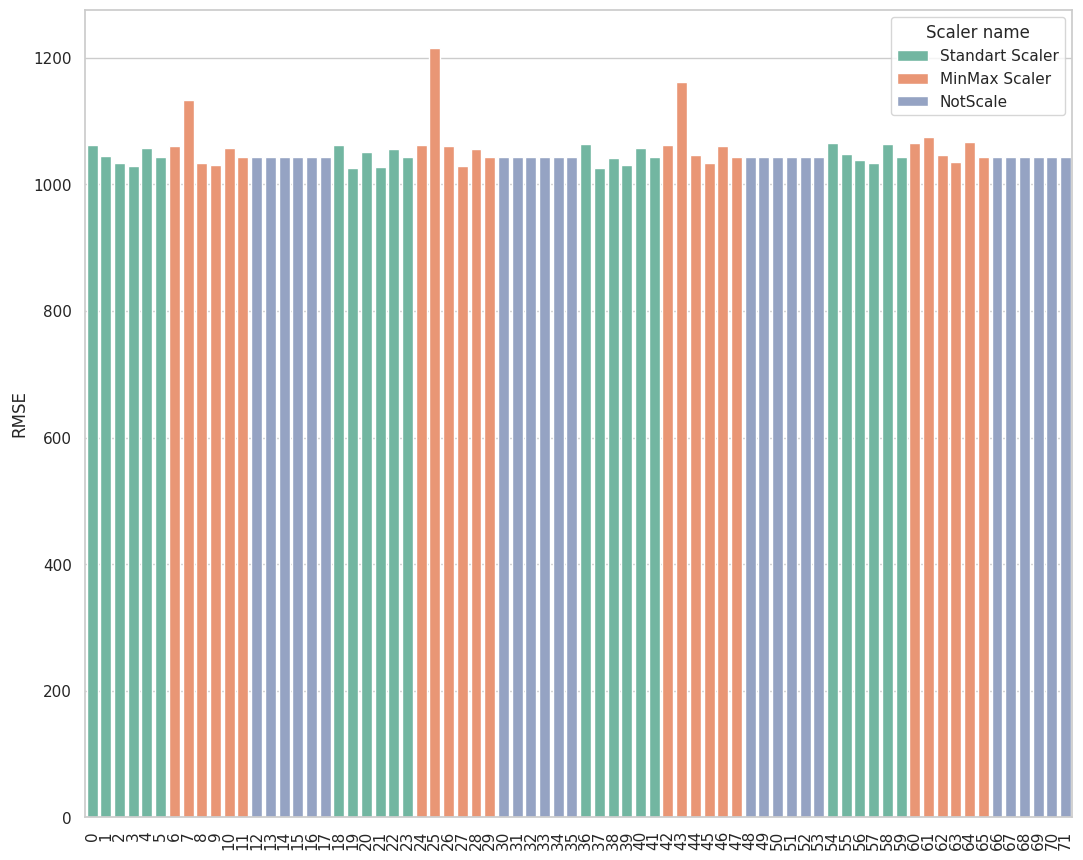

In [232]:
plt.figure(figsize=(11,9))
sns.barplot(
    data=pred_df,
    x=pred_df.index,
    y="RMSE",
    hue="Scaler name",
    dodge=False,
    palette="Set2"
)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('')
plt.show()

In [233]:
train_df['prep_time'] = train_df['delivery_duration_sec'] - train_df['estimated_order_place_duration'] - train_df['estimated_store_to_consumer_driving_duration']

In [234]:
scalers = {
    'Standart Scaler': StandardScaler()
}

feature_sets = {
    'Selected Features 40': importances_df.sort_values(by = ['Gini-importance'])[-40:].index.tolist()
}

for feature_set_name in feature_sets.keys():
  feature_set = feature_sets[feature_set_name]
  for scaler in scalers.keys():
    print(f'Scaled with {scaler} ------------------ included sample is {feature_set_name}')
    print('')
    for regression_model in regression_models.keys():
      X = train_df[feature_set].drop(columns = ['estimated_order_place_duration',
                                                'estimated_store_to_consumer_driving_duration'])
      y = train_df['prep_time']
      """!!!! y = train_df['delivery_duration']"""
      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
      train_index = X_train.index
      test_index = X_test.index

      X_scaler, y_scaler, X_scaled, y_scaled = scale(scalers[scaler], X, y)
      """X[feature_set]"""
      X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(
          X_scaled, y_scaled, random_state=42, test_size=0.2)
      _, y_predict_scaled, _, _ = make_regression(X_scaled_train, y_scaled_train[:,0],
                                            X_scaled_test, y_scaled_test[:,0],
                                            regression_models[regression_model],
                                            regression_model, verbose = False)
      rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, regression_model)
      pred_dict['Regression model'].append(regression_model)
      pred_dict['Feature set'].append(feature_set_name)
      pred_dict['RMSE'].append(rmse_error)
      pred_dict['Scaler name'].append(scaler)

results_df = pd.DataFrame(pred_dict)
print(results_df)

Scaled with Standart Scaler ------------------ included sample is Selected Features 40

Error = 1026.1128035412137 in Ridge
Error = 992.252204637636 in MLP
Error = 1005.8472063945651 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 140932, number of used features: 38
[LightGBM] [Info] Start training from score -0.000024


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Error = 992.3732236617747 in LGBM
Error = 1018.2156221630001 in Random Forest
Error = 1002.2182064837561 in Decision Tree
   Regression model           Feature set      RMSE      Scaler name
0             Ridge          Full Dataset 1061.5239  Standart Scaler
1               MLP          Full Dataset 1044.2671  Standart Scaler
2           XGBoost          Full Dataset 1033.7921  Standart Scaler
3              LGBM          Full Dataset 1028.8332  Standart Scaler
4     Random Forest          Full Dataset 1057.5729  Standart Scaler
..              ...                   ...       ...              ...
73              MLP  Selected Features 40  992.2522  Standart Scaler
74          XGBoost  Selected Features 40 1005.8472  Standart Scaler
75             LGBM  Selected Features 40  992.3732  Standart Scaler
76    Random Forest  Selected Features 40 1018.2156  Standart Scaler
77    Decision Tree  Selected Features 40 1002.2182  Standart Scaler

[78 rows x 4 columns]


This script runs one regression experiment using the top 40 features and standard scaling, trains each regression model on scaled data, evaluates performance in original units, and saves the results

In [235]:
scalers = {
    'Standart Scaler': StandardScaler()
}

feature_sets = {
    'Selected Features 40': importances_df.sort_values(by = ['Gini-importance'])[-40:].index.tolist()
}

regression_models = {
    'LGBM': LGBMRegressor()
}

for feature_set_name in feature_sets.keys():
  feature_set = feature_sets[feature_set_name]
  for scaler in scalers.keys():
    print(f'Scaled with {scaler} ------------------ included sample is {feature_set_name}')
    print('')
    for regression_model in regression_models.keys():
      X = train_df[feature_set].drop(columns = ['estimated_order_place_duration',
                                                'estimated_store_to_consumer_driving_duration'])
      y = train_df['prep_time']
      """!!!! y = train_df['delivery_duration']"""
      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
      train_index = X_train.index
      test_index = X_test.index

      X_scaler, y_scaler, X_scaled, y_scaled = scale(scalers[scaler], X, y)
      """X[feature_set]"""
      X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(
          X_scaled, y_scaled, random_state=42, test_size=0.2)
      _, y_predict_scaled, _, _ = make_regression(X_scaled_train, y_scaled_train[:,0],
                                            X_scaled_test, y_scaled_test[:,0],
                                            regression_models[regression_model],
                                            regression_model, verbose = True)
      rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, regression_model)
      pred_dict['Regression model'].append(regression_model)
      pred_dict['Feature set'].append(feature_set_name)
      pred_dict['RMSE'].append(rmse_error)
      pred_dict['Scaler name'].append(scaler)

Scaled with Standart Scaler ------------------ included sample is Selected Features 40

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 140932, number of used features: 38
[LightGBM] [Info] Start training from score -0.000024


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train error0.9021573943061744 in LGBM
Test error0.7256509441916517 in LGBM
Error = 992.3732236617747 in LGBM


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


We are using the regression model that, based on previous results, had the lowest RMSE — LGBMRegressor

In [236]:
pred_values_dict = {
    'delivery_duration_sec': train_df['delivery_duration_sec'][test_index].values.tolist(),
    'prep_duration_prediction': y_predict[:,0].tolist(),
    'estimated_order_place_duration': train_df['estimated_order_place_duration'][test_index].values.tolist(),
    'estimated_store_to_consumer_driving_duration': train_df['estimated_store_to_consumer_driving_duration'][test_index].values.tolist()
}

values_df = pd.DataFrame(pred_values_dict)

values_df['sum_total_delivery_duration'] = values_df['estimated_store_to_consumer_driving_duration'] + values_df['estimated_order_place_duration'] + values_df['prep_duration_prediction']
values_df

,delivery_duration_sec,prep_duration_prediction,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,sum_total_delivery_duration
0,2775.0000,1626.4260,251,731.0000,2608.4260
1,2681.0000,2270.4009,251,485.0000,3006.4009
2,1742.0000,1167.7467,446,338.0000,1951.7467
3,2403.0000,1818.4543,251,575.0000,2644.4543
4,2277.0000,1504.6878,446,508.0000,2458.6878
...,...,...,...,...,...
35229,2759.0000,1528.0656,446,731.0000,2705.0656
35230,1881.0000,1518.5081,251,602.0000,2371.5081
35231,2589.0000,1651.9875,251,693.0000,2595.9875
35232,3293.0000,1462.5642,446,761.0000,2669.5642


Creates a new DataFrame values_df that combines actual and predicted delivery-related times and calculates the total estimated delivery duration

In [237]:
root_mean_squared_error(values_df['delivery_duration_sec'], values_df['sum_total_delivery_duration'])

992.3732236617747

In [238]:
X = values_df[['estimated_store_to_consumer_driving_duration', 'estimated_order_place_duration', 'prep_duration_prediction']]
y = values_df['delivery_duration_sec']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [239]:
regression_models = {
    'Ridge': linear_model.Ridge(),
    'MLP': MLPRegressor(),
    'XGBoost': XGBRegressor(),
    'LGBM': LGBMRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': tree.DecisionTreeRegressor(max_depth=6)
}

rmse_dict = {}

for regression_model in regression_models.keys():
    _, y_predict, _, _ = make_regression(X_train, y_train, X_test, y_test,
                                         regression_models[regression_model], regression_model, verbose=False)
    rmse_value = root_mean_squared_error(y_test, y_predict)
    rmse_dict[regression_model] = rmse_value
    print(f'RMSE of {regression_model}: {rmse_value}')

# Find the model with the lowest RMSE
best_model = min(rmse_dict, key=rmse_dict.get)
print(f'\nThe model with the lowest RMSE is {best_model} with RMSE = {rmse_dict[best_model]}')

RMSE of Ridge: 975.9852250905556
RMSE of MLP: 974.8774941628087
RMSE of XGBoost: 1011.7493222525499
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 28187, number of used features: 3
[LightGBM] [Info] Start training from score 2852.716749
RMSE of LGBM: 982.8718925042832
RMSE of Random Forest: 1065.232395645596
RMSE of Decision Tree: 990.6732310389107

The model with the lowest RMSE is MLP with RMSE = 974.8774941628087


We define several regression models to compare.

For each model, we train it, predict, and calculate RMSE.

We store all RMSEs in a dictionary.

Finally, we find and print the model with the lowest RMSE.